In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

functions

In [2]:
# plot wellbore
def plotwellbore(ax, axisrange, radius):

    ax.set_xlim(-axisrange, axisrange)
    ax.set_ylim(-axisrange, axisrange)

    
    theta = np.linspace(0, 2 * np.pi, 201)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    ax.plot(y, x, linewidth=1, zorder=1)
    
    return ax

# determine the failure region 
def failurezone(sH, sh, sv, pm, po, poisson, sw, miuw, gamma, alphaw, betaw): 

    x_store = np.linspace(-axisrange, axisrange, 101)
    y_store = np.linspace(-axisrange, axisrange, 101)
    xw_plot = []
    yw_plot = []
    zw_plot = []
    l_store = []

    for x in x_store:
        for y in y_store:
        
            if x**2+y**2 >= 1:
            
                r = np.sqrt(x**2+y**2)
                cos_t = x/r
                sin_t = y/r
                cos_2t = cos_t**2-sin_t**2
                sin_2t = 2*cos_t*sin_t
                
                # Eqs. 2.1-2.4 in the paper
                sr  =  (sH+sh)/2*(1-(1/r)**2)+(sH-sh)/2*(1-4*(1/r)**2+3*(1/r)**4)*cos_2t+pm*(1/r)**2
                st  =  (sH+sh)/2*(1+(1/r)**2)-(sH-sh)/2*(1+3*(1/r)**4)*cos_2t-pm*(1/r)**2
                srt = -(sH-sh)/2*(1+2*(1/r)**2-3*(1/r)**4)*sin_2t
                sz  =   sv-2*poisson*(sH-sh)*(1/r)**2*cos_2t
            
                # Eqs. 2.5-2.7
                s_polar   = np.array([[sr, srt, 0],
                                      [srt, st, 0],
                                      [0,   0,  sz]])
                polar_xyz = np.array([[cos_t, -sin_t, 0],
                                      [sin_t,  cos_t, 0],
                                      [0,      0,     1]])
                xyz_W     = np.array([[ np.cos(alphaw)*np.cos(betaw),  np.sin(alphaw)*np.cos(betaw), -np.sin(betaw)],
                                      [-np.sin(alphaw),                np.cos(alphaw),               0],
                                      [ np.cos(alphaw)*np.sin(betaw),  np.sin(alphaw)*np.sin(betaw), np.cos(betaw)]])
                s_xyz = np.matmul(np.matmul(polar_xyz, s_polar), polar_xyz.transpose())
                s_W   = np.matmul(np.matmul(xyz_W, s_xyz), xyz_W.transpose())
                
                # stresses acting on the weak plane
                sz_w  = s_W[2,2]
                szx_w = s_W[2,0]
                szy_w = s_W[2,1]
            
                # Eqs. 2.8. Only results with l larger than zero are stored. The results will be used to plot failure regions.
                if   (sz_w-po+gamma*(po-pm)) > 0:
                    l = np.sqrt(szx_w**2+szy_w**2)-sw-miuw*(sz_w-po+gamma*(po-pm))
                else:
                    l = np.sqrt(szx_w**2+szy_w**2)-sw
                
                if l > 0:
                    z = -np.cos(alphaw)*np.sin(betaw)/np.cos(betaw)*x-np.sin(alphaw)*np.sin(betaw)/np.cos(betaw)*y
                    xw_plot.append(x)
                    yw_plot.append(y)
                    zw_plot.append(z)
                    l_store.append(l)
                    
                
    return xw_plot, yw_plot, zw_plot, l_store

# plot failure region
def plotfailurezone(ax, xw_plot, yw_plot, zw_plot, l_store, l_store_norm):

    scatterplt = ax.scatter(yw_plot, xw_plot, marker='.', s=4, c=l_store, vmin=0, vmax=l_colorbar, cmap=plt.cm.get_cmap("jet"), zorder=2)

    return ax

plot zone

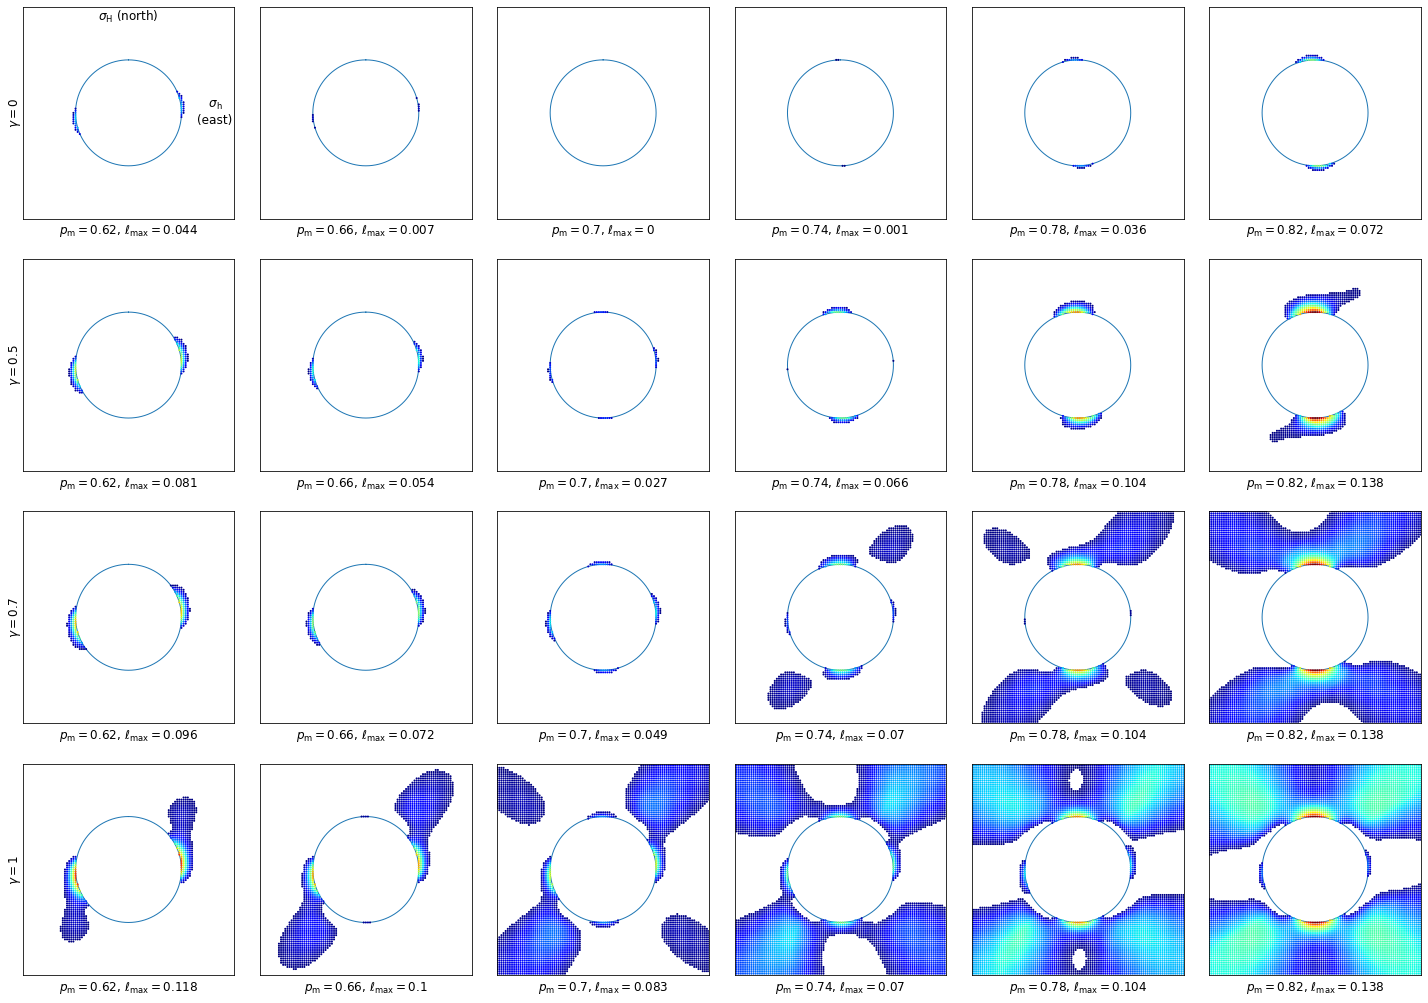

In [4]:
# parameters
sH      = 0.9
sh      = 0.7
sv      = 0.8
po      = 0.46
poisson = 0.35
sw      = 0.054
miuw    = 0.466
alphaw  = np.pi/4
betaw   = np.pi/3

fig_size     = 20
textfontsize = 12
axisrange    = 2
holeradius   = 1

fig = plt.figure(figsize=(fig_size,fig_size/1.4))

pm_storage    = [0.62,0.66,0.70,0.74,0.78,0.82,0.62,0.66,0.70,0.74,0.78,0.82,0.62,0.66,0.70,0.74,0.78,0.82,0.62,0.66,0.70,0.74,0.78,0.82]
gamma_storage = [0,0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,0.7,0.7,0.7,0.7,0.7,0.7,1,1,1,1,1,1]


# find the global maximum shear failure index, which is the maximum value among all lmax. 
l_global_max = 0
for i in range(24):
    
    pm = pm_storage[i]
    gamma = gamma_storage[i]
    xw_plot, yw_plot, zw_plot, l_store = failurezone(sH, sh, sv, pm, po, poisson, sw, miuw, gamma, alphaw, betaw)    
    
    if l_store == []:  
        l_store = []
    else: 
        if max(l_store) > l_global_max:
            l_global_max = max(l_store)
            
l_colorbar = l_global_max

# plot the figure
for i in range(24):
    
    ax = fig.add_subplot(4, 6, i + 1, aspect='equal')
    pm = pm_storage[i]
    gamma = gamma_storage[i]

    xw_plot, yw_plot, zw_plot, l_store = failurezone(sH, sh, sv, pm, po, poisson, sw, miuw, gamma, alphaw, betaw)
    ax = plotwellbore(ax, axisrange, holeradius)
    ax = plotfailurezone(ax, xw_plot, yw_plot, zw_plot, l_store, l_colorbar)  
    
    if i == 0:
        ax.text(0 , 1.74, r'$\sigma_{\mathrm{H}}$' + " "+ "(north)", color='black', fontsize=textfontsize, ha='center')
        ax.text(1.29 , 0,  "   "+ r'$\sigma_{\mathrm{h}}$' "\n" "(east)", color='black', fontsize=textfontsize, va='center')
           
    if i == 0 or i == 6 or i == 12 or i == 18:
        ax.text(-2.29, 0, r'$\gamma=$' + str(gamma), color='black', fontsize=textfontsize, rotation=90, va='center')

    if l_store == []:
        ax.text(0, -2.29, r'$p_{\mathrm{m}}=$' + str(pm) + ", " + '$\ell_{\mathrm{max}}=0$', color='black', fontsize=textfontsize, ha='center')
    else: 
        ax.text(0, -2.29, r'$p_{\mathrm{m}}=$' + str(pm) + ", " + '$\ell_{\mathrm{max}}=$' + str(np.round(max(l_store),3)), color='black', fontsize=textfontsize, ha='center')
    
    plt.xticks([])
    plt.yticks([])
    
fig.tight_layout(pad=1.5)
plt.show()
fig.savefig('regionshear.pdf')

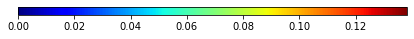

In [5]:
# plot colorbar
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_axes([0.05, 0.92, 0.9, 0.028])
cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap = plt.cm.get_cmap("jet"),
                               norm = mpl.colors.Normalize(0, l_colorbar))

fig.savefig('colorbarshear.pdf')